# Machine Learning Demo - Depict a Phylogenetic Tree with Hierarchical clustering

Kim Hee (Graduate research assistant) <br>
Universitätsmedizin Mannheim, Mannheim (UMM)

* This is prepared for `Data analysis tools (Datenanalysewerkzeuge)` at MIRACUM summer school 2019

##  How can we relate different species together? 
<img src="./images/panda.png" style="float:left; padding-right:30px; width:50%;"/>

In the decades before DNA sequencing was reliable, the scientists struggled to answer a seemingly simple question: <b>Are giant pandas closer to bears or racoons?</b> (Ref: https://t.ly/Ld1p8)

### Protocol:
<b>1. Import required libraries</b><br>
</b>2. Load RNA data ([download](https://rnacentral.org/search))</b><br>
</b>3. Sequence alignment - calculate the similarities of sequence </b><br>
</b>4. Visualize the result in dendrogram (phylogenetic tree) </b><br>

In [1]:
import os
from Bio import SeqIO, Phylo
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Alphabet import generic_rna, generic_protein 
from Bio.Align.Applications import ClustalwCommandline

[Biopython](https://biopython.org/) is a freely available tool for biological computation written in Python by an international team of developers. <br>

### Protocol:
</b>1. Import required libraries</b><br>
<b>2. Load RNA data ([download](https://rnacentral.org/search))</b><br>
</b>3. Sequence alignment - calculate the similarities of sequence </b><br>
</b>4. Visualize the result in dendrogram (phylogenetic tree) </b><br>

In [2]:
root_dir = "data"
filename = 'rRNA'
FILE_PATH = os.path.join(root_dir, f'{filename}.fasta')
records = list(SeqIO.parse(FILE_PATH, "fasta"))
records

[SeqRecord(seq=Seq('ACCCAAAGCUAGCCCAAGCAACAAUGACUAGUAAAACCAUUAUGAAACAUUCAA...UUU', SingleLetterAlphabet()), id='panda', name='panda', description='panda Species_panda', dbxrefs=[]),
 SeqRecord(seq=Seq('AACUAAAACUAGCCCAAACAACAAUCAAUUAAAACUACUACACACAACAAUUAA...CUU', SingleLetterAlphabet()), id='raccoon', name='raccoon', description='raccoon Species_raccoon', dbxrefs=[]),
 SeqRecord(seq=Seq('GCCCAGAGCUAGCCCAGACAAUAACCAAUCAAACUACCACAGGCCAAUUAAAUA...UUU', SingleLetterAlphabet()), id='black', name='black', description='black bear Species_black bear', dbxrefs=[])]

<img src='images/amino-acid-table.jpg'  style="float:left; padding-right:30px; width:40%;"/>
<b>mRNA to Amino acid chart</b>  

* The amino acids specified by each mRNA codon. Multiple codons can code for the same amino acid.
* Image source: S. Clancy et al., (2008) Translation: DNA to mRNA to Protein. Nature Education 1(1):101

<b>FASTA Format</b>
* standard format for representing either nucleotide/ gene sequences or amino acid/ protein sequences
* each sequence entry includes a header (begin with ">"), the sequence, and optional comments (starting with "#")


### Protocol:
</b>1. Import required libraries</b><br>
</b>2. Load RNA data ([download](https://rnacentral.org/search))</b><br>
<b>3. Sequence alignment - calculate the similarities of sequence </b><br>
</b>4. Visualize the result in dendrogram (phylogenetic tree) </b><br>

Clustal 
* it is a series of widely used computer programs used in Bioinformatics for multiple sequence alignment. There have been many versions of Clustal over the development of the algorithm that are listed below. 
* it is a general purpose DNA or protein multiple sequence alignment program for three or more sequences. 

e.g. unit edit distance (Levenshtein distance) between "kitten" and "sitting" is 3
  1. kitten → sitten (substitution of "k" by "s" at pos 1)
  2. sitten → sittin (substitution of "e" by "i" at pos 5)
  3. sittin → sitting (insertion of "g" at the end)

In [3]:
clustalw_cline = ClustalwCommandline("clustalw2", infile=FILE_PATH)
stdout, stderr = clustalw_cline()    
print(stdout)




 CLUSTAL 2.1 Multiple Sequence Alignments


Sequence format is Pearson
Sequence 1: panda       1583 bp
Sequence 2: raccoon     1587 bp
Sequence 3: black       1582 bp
Start of Pairwise alignments
Aligning...

Sequences (1:2) Aligned. Score:  86
Sequences (1:3) Aligned. Score:  90
Sequences (2:3) Aligned. Score:  87
Guide tree file created:   [data/rRNA.dnd]

There are 2 groups
Start of Multiple Alignment

Aligning...
Group 1: Sequences:   2      Score:27941
Group 2: Sequences:   3      Score:26454
Alignment Score 22117

CLUSTAL-Alignment file created  [data/rRNA.aln]




### Protocol:
</b>1. Import required libraries</b><br>
</b>2. Load RNA data ([download](https://rnacentral.org/search))</b><br>
</b>3. Sequence alignment - calculate the similarities of sequence </b><br>
<b>4. Visualize the result in dendrogram (phylogenetic tree) </b><br>

In [4]:
newick_path = os.path.join(root_dir, f'{filename}.dnd')
tree = Phylo.read(newick_path, "newick") # Newick tree format is a way of representing graph-theoretical trees
Phylo.draw_ascii(tree)

  ______________________________________________ panda
 |
_|_____________________________________________________________________ raccoon
 |
 |_______________________________________ black



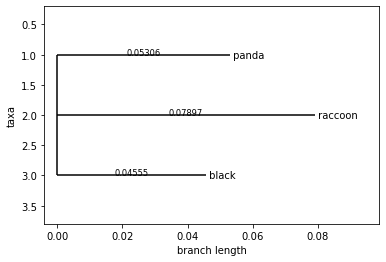

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline  
tree.rooted = True
Phylo.draw(tree, branch_labels=lambda c: c.branch_length)